## 3.1.4 로지스틱 회귀와 선형 회귀

<p>회귀란 변수가 두개가 주어졌을 때 한 변수에서 다른 변수를 예측 하거나ㅣ 두 변수의 관계를 규명하는 데 사용하는 방법이다.</p>
<p>  독립변수(예측변수) : 영향을 미칠 것으로 예상되는 변수</p>
<p>  독립변수(기준변수) : 영향을 받을 것으로 예상되는 변수</p>

### 로지틱스 회귀

<p>사용하는 이유 ; 주어진 데이터에 대한 분류</p>
<p>사용하면 좋은 이유 : 로지스틱 회귀 분석은 주어진 데이터에 대한 확신이 없거나(예를 들어 분류 결과에 대해 확신이 없을 때) 향후 추가적으로 훈련 데이터 셋을 수집하여 모델을 훈련시킬 수 있는 환경에서 사용하면 유용하다.</p>
<p> + 분석하고자 하는 대상들이 두 집단 혹은 그 이상의 집단으로 나뉘어진 경우, 개별 관측치들이 어느 집단에 분류될 수 있는지 분석하고 이를 예측하는 모형을 개발하는데 사용되는 통계 기법입니다. 따라서 일반적인 회귀분석과는 차이가 있다.

<table>
    <thead>
        <tr>
            <th>구분</th>
            <th>일반적인 회귀 분석</th>
            <th>로지스틱 회귀 분석</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>종속 변수</td>
            <td>연속형 변수</td>
            <td>이산형 변수</td>
        </tr>
        <tr>
            <td>모형 탐색 방법</td>
            <td>최소제곱법</td>
            <td>최대우도법</td>
        </tr>
        <tr>
            <td>모형 검정</td>
            <td>F-테스트, t-테스트</td>
            <td>x^2 테스트</td>
        </tr>
    </tbody>
<table>

<img src='./image/l1.png'>

<p>또한, 로지스틱 회귀 분석은 다음 절차에 따라 분석을 진행한다.</p>
<p>1단계 : 각 집단에 속하는 확률 추정치를 예측한다. 이때 추정치는 이진 분류의 경우 집단 1에 속하는 확률 P(Y=1)로 구한다.</p>
<p>2단계 : 분류 기준 값(cut-off)을 설정한 후 특정 범주로 분류한다.</p>    

<img src='./image/l2.png'>

### 데이터 준비

In [5]:
from sklearn.datasets import load_digits
digits = load_digits() # 사이킷 런에서 제공하는 mnist같은 건가

# numpy
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

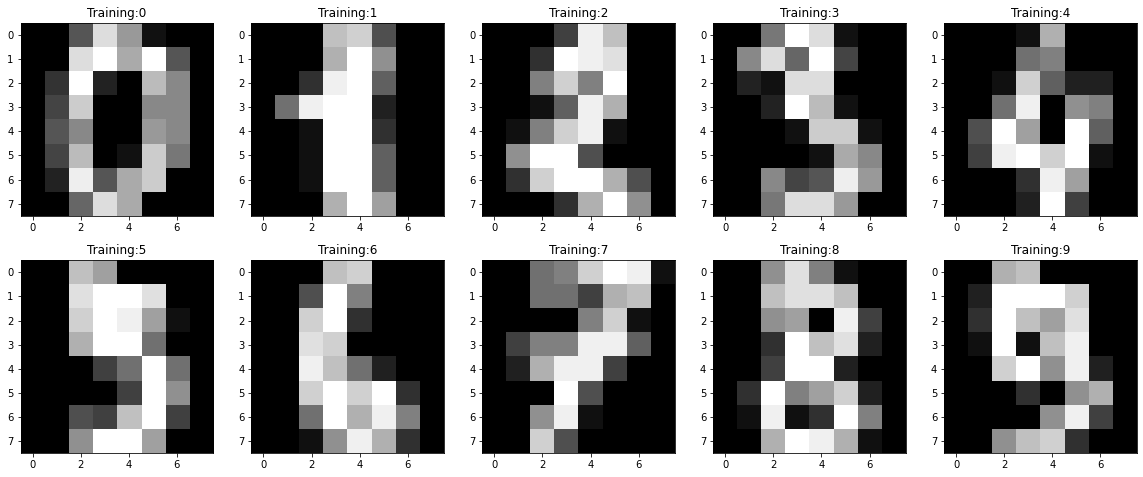

In [37]:
plt.figure(figsize=(20,8))

for idx, (image_np, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])) :
    plt.subplot(2,5, idx+1)
    plt.imshow(np.reshape(image_np, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training:{label}', fontsize=12)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=00.25, random_state=0)

In [28]:
import time
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 없는 모델이 없구먼

In [29]:
start = time.time()
logisticRegr.fit(X=X_train, y=y_train)
print(time.time() - start)

0.15208101272583008


/home/kokokk/anaconda3/envs/tf_test/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
## 이예 이 것까지
X_sample_images = X_test[0:10]
y_sample_images = y_test[0:10]

In [39]:
pred_sample_images = logisticRegr.predict(sample_images)

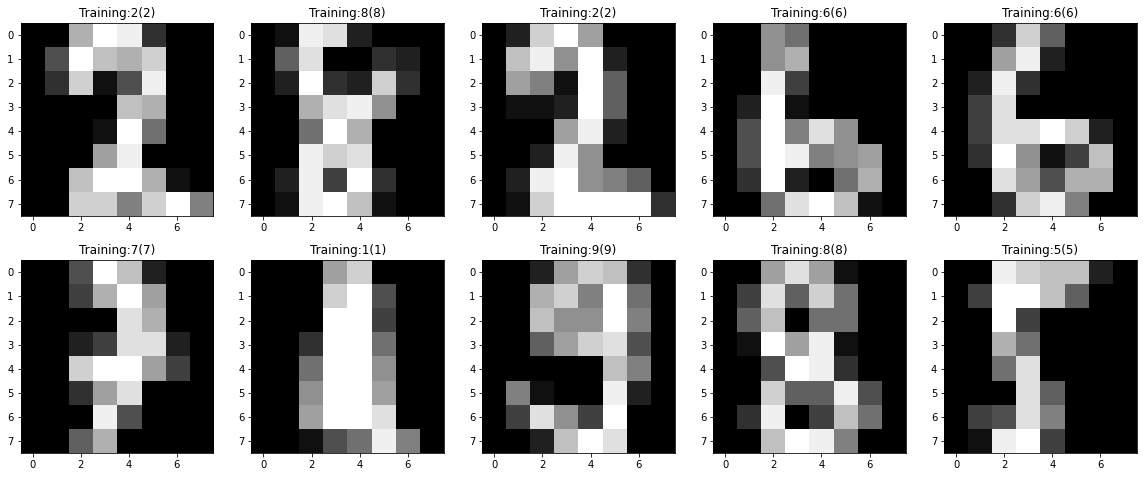

In [40]:
plt.figure(figsize=(20,8))
for idx, (image_np, gt_label, pred_label) in enumerate(zip(X_sample_images, y_sample_images, pred_sample_images)) :
    plt.subplot(2,5, idx+1)
    plt.imshow(np.reshape(image_np, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training:{gt_label}({pred_label})', fontsize=12)

In [41]:
predictions=  logisticRegr.predict(X_test) # 전체 테이터 셋에 대한 예측
score = logisticRegr.score(X_test, y_test)

In [42]:
print(score)

0.9511111111111111


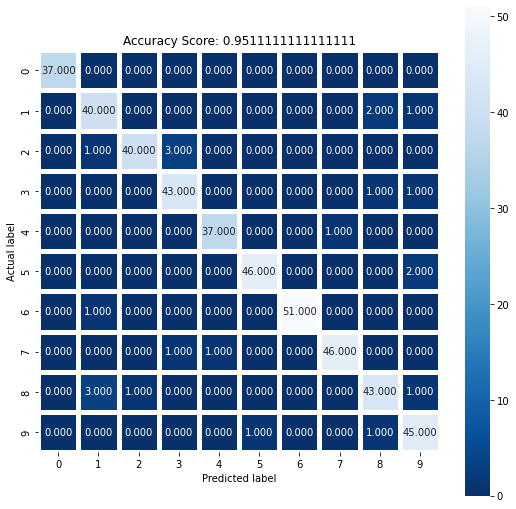

In [43]:
# 혼동행렬 시각화 하기
import numpy as np
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix (y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=5, square=True, cmap='Blues_r') # 히트맵으로 표현
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title)
plt.show()